In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def loadCSV(filename):
    data = np.loadtxt(filename, delimiter=',', skiprows=1, unpack=False)
    numOfColumns = data.shape[1]

    X = data[:,range(data.shape[1]-1)] # Kolonne 1 og 2 kommer ut for 2D
    Y = data[...,(numOfColumns-1)]
    Y = np.matrix(Y).T
    xarray = data[...,0] # Need to get this on a matrix-form!
    return X, Y, xarray, data, numOfColumns

X,Y, xarray, data, numOfColumns = loadCSV('train_1d_reg_data.csv')


In [2]:
# Getting the correct X-matrix:
ones = np.ones(X.shape[0])
X = np.c_[ones,X] # Merge two matrices


In [3]:
# Calculating the weights:
Xtrans = np.transpose(X)

XtransDotX = np.dot(Xtrans, X)
# inverse of this result:
matrix1 = np.matrix(XtransDotX)

# Inverse it
matrix1 = matrix1.I

# Xtrans dotted with Y:
XtransDotY = np.dot(Xtrans, Y)

# Finally, to get w:
w = np.dot(matrix1, XtransDotY)
print(w)

[[0.1955866 ]
 [0.61288795]]


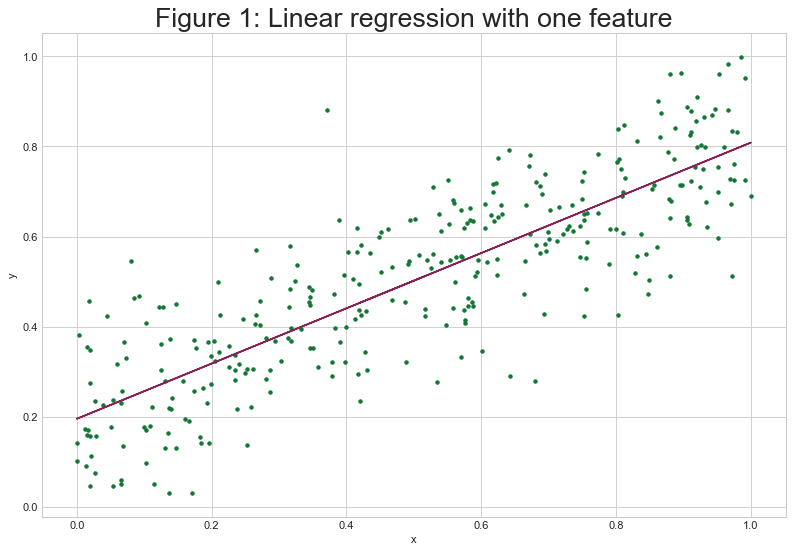

In [4]:
# plotting the given data:

plt.style.use('seaborn-whitegrid')
# Plotting function for model:
def f(x):
 return (w[0] + w[1]*x)
modelPoints = f(xarray) # was xarray
modelPoints = np.ravel(modelPoints.sum(axis=0))

Yarray=(np.squeeze(np.asarray(Y)))
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
font = {
        'weight' : 'bold',
        'size'   : 8}

plt.xlabel('x')
plt.ylabel('y')

plt.title('Figure 1: Linear regression with one feature', size = 24)
plt.scatter(xarray, Yarray, marker='.',color='#117733')
plt.plot(xarray, modelPoints, color = "#882255")

plt.show()

# Mean squared error for training data
The final hypothesis seems to be fitting the scatter plot well.

In [25]:
# Calc error for training-data 2D:
print(len(Y))

def calculateError(weights, X, Y):

    # Need to transpose the weights so that X can be multiplied with X.
    # X needs is a 325x3 matrix, whilst weights is a 3x1 matrix after it is transposed!
    Xw = np.dot(X,weights)

    # Continue with the linear algebra to calculate the error:
    error = (1/len(Y)) * (np.linalg.norm(np.subtract(Xw,Y)))**2
    return error


errorForTrainingData = calculateError(w,X,Y)
if data.shape[1] == 2:
    print("errorForTrainingData1D", errorForTrainingData)
else:
    print(("errorForTrainingData2D", errorForTrainingData))


325
errorForTrainingData1D 0.013758791126537112


In [26]:
def model(w,x):
    return x.dot(w.T)

def mse(w,x,y):
    error = np.mean(np.square(model(w,x)-y))
    return error

# y = np.matrix(Y).T
print(w.shape)
print(X.shape)
print(Y.shape)

# X = X.T
# e_mse = np.mean(((X.dot(w))-Y)**2)
#print(e_mse)

trainingError = mse(w.T,X,Y)

print(trainingError)

(2, 1)
(325, 2)
(325, 1)
0.013758791126537117


# Loading the test-data with the model


In [27]:
dataTest = np.loadtxt('test_1d_reg_data.csv', delimiter=',', skiprows=1, unpack=False)
xarrayTest = dataTest[...,0] # Need to get this on a matrix-form!
numOfColumns = dataTest.shape[1]

Ytest = dataTest[...,(numOfColumns-1)]
Xtest = data[:,range(data.shape[1]-1)] # Kolonne 1 og 2 kommer ut for 2D



In [28]:
Xtest,Ytest, xarrayTest, data, numOfColumns = loadCSV('test_1d_reg_data.csv')

In [29]:
# Updated way of getting the X-matrix!
ones = np.ones(Xtest.shape[0])
Xtest = np.c_[ones,Xtest] # Merge two matrices


## Mean squared error for test-data

In [30]:
# The error for the test-data:
print(w)
print(Ytest)
testError = mse(w.T,Xtest,Ytest)
print(testError)

[[0.1955866 ]
 [0.61288795]]
[[0.22 ]
 [0.295]
 [0.582]
 [0.558]
 [0.761]
 [0.259]
 [0.737]
 [0.374]
 [0.488]
 [0.424]
 [0.333]
 [0.339]
 [0.716]
 [0.551]
 [0.554]
 [0.723]
 [0.762]
 [0.672]
 [0.825]
 [0.379]
 [0.67 ]
 [1.   ]
 [0.493]
 [0.628]
 [0.113]
 [0.705]
 [0.553]
 [0.049]
 [0.219]
 [0.584]
 [0.526]
 [0.49 ]
 [0.397]
 [0.646]
 [0.698]
 [0.445]
 [0.293]
 [0.768]
 [0.439]
 [0.951]
 [0.578]
 [0.934]
 [0.475]
 [0.582]
 [0.21 ]
 [0.306]
 [0.144]
 [0.298]
 [0.616]
 [0.406]
 [0.289]
 [0.582]
 [0.807]
 [0.679]
 [0.102]
 [0.523]
 [0.573]
 [0.534]
 [0.285]
 [0.351]
 [0.446]
 [0.754]
 [0.485]
 [0.362]
 [0.487]
 [0.234]
 [0.563]
 [0.445]
 [0.   ]
 [0.631]
 [0.57 ]
 [0.389]
 [0.702]
 [0.646]
 [0.298]
 [0.671]
 [0.68 ]
 [0.16 ]
 [0.719]
 [0.238]
 [0.799]
 [0.387]
 [0.37 ]
 [0.385]
 [0.316]
 [0.401]
 [0.495]
 [0.758]
 [0.575]
 [0.747]
 [0.498]
 [0.53 ]
 [0.44 ]
 [0.675]
 [0.545]
 [0.206]
 [0.469]
 [0.245]
 [0.428]
 [0.409]
 [0.153]
 [0.242]
 [0.581]
 [0.714]
 [0.67 ]
 [0.605]
 [0.444]
 [0.449]

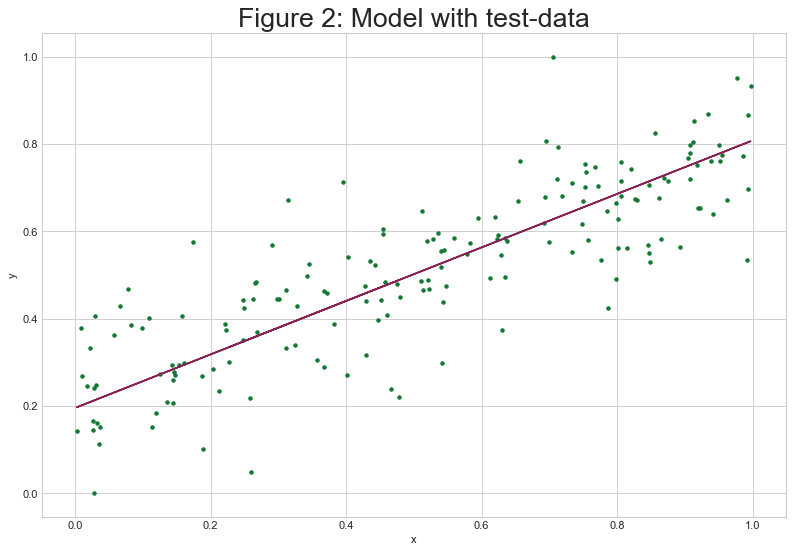

In [31]:
# Plotting the test-data and the model:

plt.style.use('seaborn-whitegrid')

# Plotting function for model:
def f(x):
 return (w[0] + w[1]*x)
modelPoints = f(xarrayTest)
modelPoints = np.ravel(modelPoints.sum(axis=0))

YtestArray=(np.squeeze(np.asarray(Ytest)))
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

font = {
        'weight' : 'bold',
        'size'   : 8}

plt.xlabel('x')
plt.ylabel('y')

plt.title('Figure 2: Model with test-data', size = 24)
plt.scatter(xarrayTest, YtestArray, marker='.',color='#117733')
plt.plot(xarrayTest, modelPoints, color = "#882255")

plt.show()

In [32]:
print("1D Weights for training data: ", w)
print("Error for training data: ", trainingError)
print("Error for test data: ", testError)



1D Weights for training data:  [[0.1955866 ]
 [0.61288795]]
Error for training data:  0.013758791126537117
Error for test data:  0.012442457462048953
